This is the list of rotations that we have used:
[(1, 2, 3), (7, 5, 4), (8, 6, 10), (9, 12, 11)]


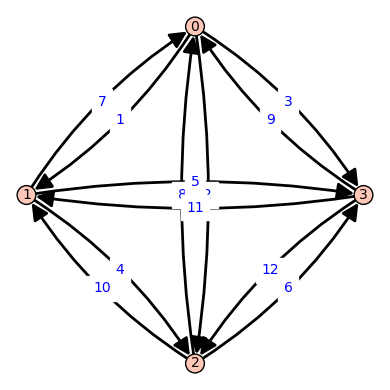

List of faces
[0, 1, 3]
[0, 2, 3, 1, 2, 0, 3, 2, 1]


[(1, 5, 9), (2, 6, 11, 4, 8, 3, 12, 10, 7)]

In [65]:
track_faces(G, {1,2,3}).cycle_tuples()

In [64]:
def track_faces(G, S):
    """
        G is a simple graph with no loop. 
        We create a set of halfedges, indexed by 1, ..., N = 2*G.num_edges().
        Then we generate the permutation alpha and sigma -- vertices in S will go in one direction,  
        vertices not in S in the other. 
        And we return phi. 
        Then we can ask for 
         phi.cycle_type()
         or
         phi.cycle_tuples()
    """

    E1 = G.edges(labels=None)
    E2 = [(y,x) for (x,y) in E1]
    H = [None] + E1 + E2
    N = len(H)-1


    L = [tuple(
        Permutations([H.index((v,x)) for x in G.neighbor_iterator(v)])[1 if v in S else 0]
      )
      for v in G.vertices()]

    alpha=Permutation([(i,i+len(E1)) for i in range(1,len(E1)+1)])

    sigma = Permutation(L)

    print("This is the list of rotations that we have used:")
    print(L)
    D = DiGraph(G)
    for x,y in E1+E2: 
        D.set_edge_label(x,y,H.index((x,y)))
    #print(G.edges())
    D.show(edge_labels=True)
    
    
    phi=alpha*sigma

    print("List of faces")
    for C in phi.cycle_tuples():
        print([H[e][0] for e in C])
        
    return phi

In [50]:
G = graphs.CompleteGraph(4)


In [4]:
list(Permutations([0,1,2]))[1]

[0, 2, 1]